# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/FinalProject/
!ls

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-4008dc0b4147>", line 1, in <module>
    get_ipython().magic('cd /content/drive/MyDrive/FinalProject/')
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2160, in magic
    return self.run_line_magic(magic_name, magic_arg_s)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2081, in run_line_magic
    result = fn(*args,**kwargs)
  File "<decorator-gen-84>", line 2, in cd
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magic.py", line 188, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/magics/osm.py", line 288, in cd
    oldcwd = py3compat.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of

OSError: ignored

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
import numpy as np
import pandas as pd
def data_parser():
  df = pd.read_csv("pbp-2021.csv")
  #Remove irrelevant columns
  df1 = df.drop(["GameId","Quarter","Minute","Second","Down","ToGo", "YardLine","SeriesFirstDown","NextScore","TeamWin","Yards","SeasonYear","IsIncomplete","IsTouchdown","IsSack"] , axis = 1)
  df1 = df1.drop(["IsChallenge","IsMeasurement","IsInterception","IsFumble","IsPenalty","IsTwoPointConversion","YardLineFixed","YardLineDirection","IsPenaltyAccepted","IsChallengeReversed","IsNoPlay","PenaltyYards","IsTwoPointConversionSuccessful"], axis = 1)
  df1 = df1.drop(["Unnamed: 10", "Unnamed: 12","Unnamed: 16","Unnamed: 17", "Description","Formation","IsRush","IsPass","PassType","Challenger","RushDirection","PenaltyTeam","PenaltyType"] , axis = 1)
  #Remove rows with indoor teams
  df2 = df1[(df1['OffenseTeam'] != "MIN") & (df1['OffenseTeam'] != "LAC") & (df1['OffenseTeam'] != "ARI") & (df1['OffenseTeam'] != "ATL") & (df1['OffenseTeam'] != "DAL") & (df1['OffenseTeam'] != "DET") & (df1['OffenseTeam'] != "HOU") & (df1['OffenseTeam'] != "IND") & (df1['OffenseTeam'] != "NO") & (df1['OffenseTeam'] != "LV") & (df1['OffenseTeam'] != "LAR") & (df1['OffenseTeam'] != "LA")]
  df2 = df2[(df2['DefenseTeam'] != "MIN") & (df2['DefenseTeam'] != "LAC") & (df2['DefenseTeam'] != "ARI") & (df2['DefenseTeam'] != "ATL") & (df2['DefenseTeam'] != "DAL") & (df2['DefenseTeam'] != "DET") & (df2['DefenseTeam'] != "HOU") & (df2['DefenseTeam'] != "IND") & (df2['DefenseTeam'] != "NO") & (df2['DefenseTeam'] != "LV") & (df2['DefenseTeam'] != "LAR") & (df2['DefenseTeam'] != "LA") ]
  #Remove rows with inaccurate play type
  df3 = df2.dropna(inplace = False, axis = 0)
  df3 = df3[(df3['PlayType'] == "PASS") | (df3['PlayType'] == "RUSH") | (df3['PlayType'] == "FIELD GOAL")]
  #Name Change
  df3['OffenseTeam'] = np.where(df3['OffenseTeam'] == "BUF" , "Buffalo Bills", np.where(df3['OffenseTeam'] == "NE" , "New England Patriots", np.where(df3['OffenseTeam'] == "NYJ" , "New York Jets",np.where(df3['OffenseTeam'] == "NYG" , "New York Giants",np.where(df3['OffenseTeam'] == "CLE" , "Cleveland Browns",np.where(df3['OffenseTeam'] == "KC" , "Kansas City Chiefs",np.where(df3['OffenseTeam'] == "PIT" , "Pittsburgh Steelers",np.where(df3['OffenseTeam'] == "CAR" , "Carolina Panthers",np.where(df3['OffenseTeam'] == "DEN" , "Denver Broncos",np.where(df3['OffenseTeam'] == "MIA" , "Miami Dolphins",np.where(df3['OffenseTeam'] == "WAS" , "Washington Commanders", np.where(df3['OffenseTeam'] == "CHI" , "Chicago Bears",np.where(df3['OffenseTeam'] == "BAL" , "Baltimore Ravens",np.where(df3['OffenseTeam'] == "CIN" , "Cincinnati Bengals",np.where(df3['OffenseTeam'] == "JAX" , "Jacksonville Jaguars",np.where(df3['OffenseTeam'] == "PHI" , "Philadelphia Eagles",np.where(df3['OffenseTeam'] == "SEA" , "Seattle Seahawks",np.where(df3['OffenseTeam'] == "TEN" , "Tennessee Titans",np.where(df3['OffenseTeam'] == "SF" , "San Francisco 49ers",np.where(df3['OffenseTeam'] == "GB" , "Green Bay Packers",np.where(df3['OffenseTeam'] == "TB" , "Tampa Bay Buccaneers",df3["OffenseTeam"])))))))))))))))))))))
  #Adding column to track play type
  #print(df3)
  #pd.set_option('display.max_columns', None)  # or 1000
  #pd.set_option('display.max_rows', None)  # or 1000
  #pd.set_option('display.max_colwidth', -1)  # or 199
  #df3.to_csv("playbyplay.csv")
  df3.groupby(["GameDate","OffenseTeam", "PlayType"]).aggregate({"PlayType" : "count"}).to_csv("playbyplay.csv")
  return df3.groupby(["GameDate","OffenseTeam", "PlayType"]).aggregate({"PlayType" : "count"})
  #return df3






############ Function Call ############
data_parser()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-91f7bc09c2b2>", line 33, in <module>
    data_parser()
  File "<ipython-input-5-91f7bc09c2b2>", line 4, in data_parser
    df = pd.read_csv("pbp-2021.csv")
  File "/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 586, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 482, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py", line 811, in __init__
    self._engine = self._make_engine(self.engine)
  File "/usr/local/lib/python3.7/dist-packages/pa

OSError: ignored

## Web Collection Requirement \#1


In [ ]:
import requests
from bs4 import BeautifulSoup
from pprint import pprint
def web_parser1():
  with open('phase2.html') as f:
    soup = BeautifulSoup(f, "html.parser")
  passtags = soup.find_all("table", {'class': 'per_match_toggle sortable stats_table now_sortable', 'id': 'passing', 'data-cols-to-freeze': ',2'})[0]
  rushtags = soup.find_all("table", {'class': 'per_match_toggle sortable stats_table now_sortable', 'id': 'rushing', 'data-cols-to-freeze': ',2'})[0]
  kicktags = soup.find_all("table", {'class': 'per_match_toggle sortable stats_table now_sortable', 'id': 'kicking', 'data-cols-to-freeze': ',2'})[0]

  tr_tags = passtags.find_all('tr')[1:34]
  print('Passing Offense')
  passlist = []
  for row in tr_tags:
    try:
      td_tags = row.find_all('td')
      team_name = td_tags[0].text
      comp = td_tags[2].text
      att = td_tags[3].text
      pct = td_tags[4].text
      yds = td_tags[5].text
      tud = td_tags[6].text
      datalist = [team_name, comp, att, pct, yds, tud]
      passlist.append(datalist)
    except:
      continue
  passdf = pd.DataFrame(passlist, columns = ['Team', 'Pass Completions', 'Pass Attempts', 'Completion Percentage', 'Total Passing Yards', 'Total Passing Touchdowns'])
  print(passdf)
  passdf.to_csv("PassingOffense.csv")

  rushtr_tags = rushtags.find_all('tr')[1:34]
  print('Rushing Offense')
  rushlist = []
  for row in rushtr_tags:
    try:
      td_tags = row.find_all('td')
      team_name = td_tags[0].text
      att = td_tags[2].text
      yds = td_tags[3].text
      tud = td_tags[4].text
      ypr = td_tags[6].text
      datalist = [team_name, att, ypr, yds, tud]
      rushlist.append(datalist)
    except:
      continue
  rushdf = pd.DataFrame(rushlist, columns = ['Team', 'Rushing Attempts', 'Yards Gained per Rush', 'Total Rushing Yards', 'Total Rushing Touchdowns'])
  print(rushdf)
  rushdf.to_csv("RushingOffense.csv")

  kicktr_tags = kicktags.find_all('tr')[1:34]
  print('Field Goal Performance')
  kicklist = []
  for row in kicktr_tags:
    try:
      td_tags = row.find_all('td')
      team_name = td_tags[0].text
      fga = td_tags[12].text
      fgm = td_tags[13].text
      fgp = td_tags[15].text
      datalist = [team_name, fga, fgm, fgp]
      kicklist.append(datalist)
    except:
      continue
  kickdf = pd.DataFrame(kicklist, columns = ['Team', 'Total Field Goal Attempts', 'Total Field Goals Made', 'Field Goal Accuracy'])
  print(kickdf)
  kickdf.to_csv("KickingOffense.csv")





############ Function Call ############
web_parser1()

Passing Offense
                        Team Pass Completions Pass Attempts  \
0       Tampa Bay Buccaneers              492           731   
1       Los Angeles Chargers              443           674   
2             Dallas Cowboys              444           647   
3         Kansas City Chiefs              448           675   
4           Los Angeles Rams              406           607   
5          Las Vegas Raiders              429           628   
6         Cincinnati Bengals              384           555   
7          Green Bay Packers              402           593   
8              Buffalo Bills              415           655   
9          Arizona Cardinals              415           591   
10         Minnesota Vikings              398           604   
11       San Francisco 49ers              343           514   
12          Baltimore Ravens              396           611   
13      New England Patriots              364           535   
14       Pittsburgh Steelers           

## Web Collection Requirement #2

In [ ]:
import requests
import datetime
import pandas as pd
def web_parser2():
    teamlist = ['Tennessee Titans','New York Giants','Pittsburgh Steelers','Carolina Panthers','Baltimore Ravens','Tampa Bay Buccaneers','New York Jets','Denver Broncos','Miami Dolphins','Philadephia Eagles','Chicago Bears','New England Patriots','Washington Commanders','Green Bay Packers','Buffalo Bills','San Francisco 49ers','Jacksonville Jaguars','Cleveland Browns','Kansas City Chiefs','Seattle Seahawks','Cincinnati Bengals']
    latlist = [36.166461,40.812194,40.446786,35.225808,39.277969,27.975967,40.812194,39.743936,25.957919,39.900775,41.862306,42.090925,38.907697,44.501306,42.773739,37.4033,30.323925,41.506022,39.048914,47.595153,39.095442]
    lonlist = [-86.771289,-74.076983,-80.015761,-80.852861,-76.622767,-82.50335,-74.076983,-105.020097,-80.238842,-75.167453,-87.616672,-71.26435,-76.864517,-88.062167,-78.786978,-121.9694,-81.637356,-81.699564,-94.484039,-122.331625,-84.516039]
    timelist = [1631466000,1631811600,1632070800,1632675600,1633280400,1633885200,1634230800,1634490000,1634576400,1634835600,1635094800,1635699600,1635786000,1636308000,1636394400,1636912800,1637517600,1637604000,1638122400,1638208800,1638727200,1638813600,1639332000,1639936800,1640023200,1640282400,1640473200,1640541600]
    dtlist = []
    datalist = []
    for time in timelist:
      dt = datetime.datetime.fromtimestamp(time)
      dtstr = str(dt)
      dtlist.append(dtstr[0:10])
      zipped = list(zip(latlist,lonlist, teamlist))
      weatherlist = []
    for item in zipped:
      for time in timelist:
        key = 'aa10142f9bec28074eed5c22dd8b44f4'
        lat = item[0]
        lon = item[1]
        team = item[2]
        r = requests.get(f"http://history.openweathermap.org/data/2.5/history/city?lat={lat}&lon={lon}&type=hour&start={time}&end={time}&units=imperial&appid={key}")
        data = r.json()
        temp = data["list"][0]['main']['temp']
        windspeed = data["list"][0]["wind"]["speed"]
        weather1 = data["list"][0]["weather"][0]["main"]
        weather2 = data["list"][0]["weather"][0]["description"]
        inner = [team, time, temp, windspeed, weather1, weather2]
        datalist.append(inner)
    for item in datalist:
      dt = datetime.datetime.fromtimestamp(item[1])
      dtstr = str(dt)
      item[1] = dtstr[0:10]
    weatherdf = pd.DataFrame(datalist, columns = ['Team', 'Date', 'Temperature', 'Wind Speed', 'Weather Description', 'Weather Conditions'])
    weatherdf.to_csv("GameWeather.csv")
    return weatherdf
############ Function Call ############
web_parser2()

,Team,Date,Temperature,Wind Speed,Weather Description,Weather Conditions
0,Tennessee Titans,2021-09-12,82.63,8.01,Clear,clear sky
1,Tennessee Titans,2021-09-16,79.25,5.99,Clouds,broken clouds
2,Tennessee Titans,2021-09-19,72.07,1.99,Rain,light rain
3,Tennessee Titans,2021-09-26,74.48,1.01,Clear,clear sky
4,Tennessee Titans,2021-10-03,70.88,5.01,Clouds,broken clouds
...,...,...,...,...,...,...
583,Cincinnati Bengals,2021-12-19,37.89,1.01,Clouds,overcast clouds
584,Cincinnati Bengals,2021-12-20,41.04,1.99,Clear,clear sky
585,Cincinnati Bengals,2021-12-23,46.56,1.99,Clouds,scattered clouds
586,Cincinnati Bengals,2021-12-25,56.97,4.00,Clouds,overcast clouds


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1.

2.

3.

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://drive.google.com/file/d/1Yzr6wjq-uPdPWALDi7smmf7laqkeBFbA/view?usp=sharing
*   Web Collection #1 Source: https://www.pro-football-reference.com/years/2021/
*   Web Collection #2 Source: https://openweathermap.org/history



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [ ]:
def insight1():
  df = pd.read_csv("playbyplay.csv")
  df1 = pd.read_csv("GameWeather.csv")
  #df2 = df1.groupby(["Date", "Team"]).agg({"Temperature" : "max" , "Wind Speed" : "max"})
  df2 = df1.merge(df, how = 'left', left_on=["Date","Team"], right_on=['GameDate','OffenseTeam'])
  df2 = df2.dropna(inplace = False,axis = 0)

  df3 = df2[(df2['Team'] == "New England Patriots")]
  max_temp = df3["Temperature"].max()
  min_temp = df3["Temperature"].min()
  df3 = df3[(df3["Temperature"] == max_temp) | (df3["Temperature"] == min_temp)]
  dfTEAM1 = df3.groupby(["Date","Team", "Temperature", "PlayType"]).aggregate({"PlayType" : "count"})

  df4 = df2[(df2['Team'] == "Cincinnati Bengals")]
  max_temp1 = df4["Temperature"].max()
  min_temp1 = df4["Temperature"].min()
  df4 = df4[(df4["Temperature"] == max_temp1) | (df4["Temperature"] == min_temp1)]
  dfTEAM2 = df4.groupby(["Date","Team", "Temperature", "PlayType"]).aggregate({"PlayType" : "count"})

  df5 = df2[(df2['Team'] == "Miami Dolphins")]
  max_temp2 = df5["Temperature"].max()
  min_temp2 = df5["Temperature"].min()
  df5 = df5[(df5["Temperature"] == max_temp2) | (df5["Temperature"] == min_temp2)]
  dfTEAM3 = df5.groupby(["Date","Team", "Temperature", "PlayType"]).aggregate({"PlayType" : "count"})

  df6 = df2[(df2['Team'] == "Kansas City Chiefs")]
  max_temp3 = df6["Temperature"].max()
  min_temp3 = df6["Temperature"].min()
  df6 = df6[(df6["Temperature"] == max_temp3) | (df6["Temperature"] == min_temp3)]
  dfTEAM4 = df6.groupby(["Date","Team", "Temperature", "PlayType"]).aggregate({"PlayType" : "count"})

  df7 = df2[(df2['Team'] == "Tennessee Titans")]
  max_temp4 = df7["Temperature"].max()
  min_temp4 = df7["Temperature"].min()
  df7 = df7[(df7["Temperature"] == max_temp4) | (df7["Temperature"] == min_temp4)]
  dfTEAM5 = df7.groupby(["Date","Team", "Temperature", "PlayType"]).aggregate({"PlayType" : "count"})

  pd.set_option('display.max_columns', None)  # or 1000
  pd.set_option('display.max_rows', None)  # or 1000
  pd.set_option('display.max_colwidth', -1)  # or 199

  frames = [dfTEAM1,dfTEAM2,dfTEAM3,dfTEAM4,dfTEAM5]
  return pd.concat(frames)
  #df4.groupby(["Date","Team", "Temperature","PlayType"]).aggregate({"PlayType" : "count"})

############ Function Call ############
insight1()

NameError: ignored

### Insight 1 Explanation

For this insight, we found the hottest and coldest games that 5 teams played using the temperature data from the weather API. We then combined this with our play by play dataset so that we could analyze how the variety and number of plays differed for each game. This is important data because colder NFL games played in harsh environments do not usually feature as many plays as warmer games, and we wanted to see where the specific differences were. We hypothesized that the team's coldest games would feature more rushing plays than their warmest games, and their warmest games would feature more passing plays. However, the data we collected from our sample size did not appear to support the hypothesis.

In [ ]:
import matplotlib.pyplot as plt
def insight2():
  pd.options.mode.chained_assignment = None  # default='warn'
  df = pd.read_csv("KickingOffense.csv")
  df1 = pd.read_csv("GameWeather.csv")
  df2 = df1.merge(df, how = 'left', left_on=["Team"], right_on=['Team'])
  df2 = df2.dropna(inplace = False,axis = 0)

  df3 = df2[(df2['Team'] == "Tennessee Titans")]
  avg_wind = df3["Wind Speed"].mean()
  df3["Average Wind"] = avg_wind
  TEAM1 = df3.groupby(["Team","Average Wind"]).agg({"Total Field Goal Attempts" : "max" , "Total Field Goals Made" : "max", "Field Goal Accuracy" : "max"})

  df4 = df2[(df2['Team'] == "Cincinnati Bengals")]
  avg_wind1 = df4["Wind Speed"].mean()
  df4["Average Wind"] = avg_wind1
  TEAM2 = df4.groupby(["Team","Average Wind"]).agg({"Total Field Goal Attempts" : "max" , "Total Field Goals Made" : "max", "Field Goal Accuracy" : "max"})

  df5 = df2[(df2['Team'] == "New England Patriots")]
  avg_wind2 = df5["Wind Speed"].mean()
  df5["Average Wind"] = avg_wind2
  TEAM3 = df5.groupby(["Team","Average Wind"]).agg({"Total Field Goal Attempts" : "max" , "Total Field Goals Made" : "max", "Field Goal Accuracy" : "max"})

  df6 = df2[(df2['Team'] == "Kansas City Chiefs")]
  avg_wind3 = df6["Wind Speed"].mean()
  df6["Average Wind"] = avg_wind3
  TEAM4 = df6.groupby(["Team","Average Wind"]).agg({"Total Field Goal Attempts" : "max" , "Total Field Goals Made" : "max", "Field Goal Accuracy" : "max"})

  df7 = df2[(df2['Team'] == "Miami Dolphins")]
  avg_wind4 = df7["Wind Speed"].mean()
  df7["Average Wind"] = avg_wind4
  TEAM5 = df7.groupby(["Team","Average Wind"]).agg({"Total Field Goal Attempts" : "max" , "Total Field Goals Made" : "max", "Field Goal Accuracy" : "max"})
  frames = [TEAM1,TEAM2,TEAM3,TEAM4,TEAM5]
  concat = pd.concat(frames)
  df = concat.sort_values(by = "Average Wind")
  df.to_csv('WindField.csv')
  return df
  '''
  plt.plot(df['Average Wind'], df['Field Goal Accuracy'], color = 'blue')
  plt.xticks(df['Average Wind'])
  plt.xlabel('Average Wind Speed')
  plt.ylabel('Field Goal Accuracy Percentage')
  plt.title('Field Goal Accuracy by Average Wind Speed')
  plt.show()
  '''



############ Function Call ############
insight2()

,,Total Field Goal Attempts,Total Field Goals Made,Field Goal Accuracy
Team,Average Wind,,,
New England Patriots,3.062500,39.0,36.0,92.3%
Cincinnati Bengals,3.433214,34.0,29.0,85.3%
Kansas City Chiefs,4.394286,32.0,28.0,87.5%
Tennessee Titans,5.883571,32.0,26.0,81.3%
Miami Dolphins,10.234643,31.0,23.0,74.2%


### Insight 2 Explanation

In this insight, we found the average wind speed for the seasons of the 5 teams from our previous sample size and compared this data to the number of field goals the team made throughout the season, along with their overall accuracy. Since wind plays a very important role in determining whether kickers make their field goals, we thought it would be interesting to see how the wind speed that different teams had to play through impacted their probability of scoring a successful field goal.

In [ ]:
def insight3():
  df = pd.read_csv("playbyplay.csv")
  df1 = pd.read_csv("GameWeather.csv")
  df2 = df1.merge(df, how = 'left', left_on=["Date","Team"], right_on=['GameDate','OffenseTeam'])
  df2 = df2.dropna(inplace = False,axis = 0)

  df3 = df2[(df2['Weather Description'] == "Rain")]
  df4 = df3.groupby(["Team","Weather Description","PlayType"]).agg({"PlayType" : "count"})

  df5 = df4.loc["Buffalo Bills","PlayType"]
  pass_ratio_bills = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_bills = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df5 = df4.loc["Chicago Bears","PlayType"]
  pass_ratio_bears = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_bears = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df5 = df4.loc["Green Bay Packers","PlayType"]
  pass_ratio_pack = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_pack = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df5 = df4.loc["Kansas City Chiefs","PlayType"]
  pass_ratio_chiefs = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_chiefs = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df5 = df4.loc["Miami Dolphins","PlayType"]
  pass_ratio_dolphins = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_dolphins = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df5 = df4.loc["Tennessee Titans","PlayType"]
  pass_ratio_titans = round(((df5.iloc[1]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)
  rush_ratio_titans = round(((df5.iloc[2]) / (df5.iloc[0]+ df5.iloc[1] + df5.iloc[2])) * 100 , 2)

  df4.loc["Buffalo Bills","Pass Ratio %"] = pass_ratio_bills
  df4.loc["Buffalo Bills","Rush Ratio %"] = rush_ratio_bills
  df4.loc["Chicago Bears","Pass Ratio %"] = pass_ratio_bears
  df4.loc["Chicago Bears","Rush Ratio %"] = rush_ratio_bears
  df4.loc["Green Bay Packers","Pass Ratio %"] = pass_ratio_pack
  df4.loc["Green Bay Packers","Rush Ratio %"] = rush_ratio_pack
  df4.loc["Kansas City Chiefs","Pass Ratio %"] = pass_ratio_chiefs
  df4.loc["Kansas City Chiefs","Rush Ratio %"] = rush_ratio_chiefs
  df4.loc["Miami Dolphins","Pass Ratio %"] = pass_ratio_dolphins
  df4.loc["Miami Dolphins","Rush Ratio %"] = rush_ratio_dolphins
  df4.loc["Tennessee Titans","Pass Ratio %"] = pass_ratio_titans
  df4.loc["Tennessee Titans","Rush Ratio %"] = rush_ratio_titans
  #return df4.groupby(["Team","Weather Description","Pass Ratio", "Rush Ratio","PlayType"]).agg({"PlayType" : "count"})
  return df4

############ Function Call ############
insight3()

PlayType  Pass Ratio %  \
Team               Weather Description PlayType                             
Buffalo Bills      Rain                FIELD GOAL  3         58.62          
                                       PASS        68        58.62          
                                       RUSH        45        58.62          
Chicago Bears      Rain                FIELD GOAL  1         60.00          
                                       PASS        33        60.00          
                                       RUSH        21        60.00          
Green Bay Packers  Rain                FIELD GOAL  3         52.17          
                                       PASS        36        52.17          
                                       RUSH        30        52.17          
Kansas City Chiefs Rain                FIELD GOAL  2         65.38          
                                       PASS        51        65.38          
                                       RUSH        25        65.38          
Miami Dolphins     Rain                FIELD GOAL  2         58.46          
                                       PASS        38        58.46          
                                       RUSH        25        58.46          
Tennessee Titans   Rain                FIELD GOAL  5         49.43          
                                       PASS        43        49.43          
                                       RUSH        39        49.43          

                                                   Rush Ratio %  
Team               Weather Description PlayType                  
Buffalo Bills      Rain                FIELD GOAL  38.79         
                                       PASS        38.79         
                                       RUSH        38.79         
Chicago Bears      Rain                FIELD GOAL  38.18         
                                       PASS        38.18         
                                       RUSH        38.18         
Green Bay Packers  Rain                FIELD GOAL  43.48         
                                       PASS        43.48         
                                       RUSH        43.48         
Kansas City Chiefs Rain                FIELD GOAL  32.05         
                                       PASS        32.05         
                                       RUSH        32.05         
Miami Dolphins     Rain                FIELD GOAL  38.46         
                                       PASS        38.46         
                                       RUSH        38.46         
Tennessee Titans   Rain                FIELD GOAL  44.83         
                                       PASS        44.83         
                                       RUSH        44.83

### Insight 3 Explanation

For this insight, we identified the games that our 5 game sample size had to play where it was raining, and found the number of plays they ran as well as the ratio of each type of play to the overall total. Since it is harder to pass the ball accurately in rainy games, we wanted to see if the percentage of rushing plays that teams ran was higher than it would be in games with clear weather. The data supported the idea that the percentage of passing and rushing plays ran was much more similar in rainy games than it was in clear weather games.

In [ ]:
def insight4():
  df = pd.read_csv("PassingOffense.csv")
  df1 = pd.read_csv("RushingOffense.csv")
  df_weather = pd.read_csv("GameWeather.csv")
  df = df.drop(["Pass Completions","Pass Attempts","Completion Percentage", "Total Passing Yards"] , axis = 1)
  df1 = df1.drop(["Rushing Attempts","Yards Gained per Rush","Total Rushing Yards"], axis = 1)
  df2 = df.merge(df1, how = 'left', left_on=["Team"], right_on=['Team'])

  teams = df2["Team"]
  passing = df2["Total Passing Touchdowns"]
  rushing = df2["Total Rushing Touchdowns"]
  frames = [teams,passing,rushing]
  df3 = pd.concat(frames, axis = 1)
  df3 = df3[(df3['Team'] == "Buffalo Bills") | (df3['Team'] == "Chicago Bears") | (df3['Team'] == "Green Bay Packers") | (df3['Team'] == "Miami Dolphins") | (df3['Team'] == "Kansas City Chiefs")| (df3['Team'] == "Tennessee Titans")]

  #df_weather = df_weather.drop(["Date","Temperature","Wind Speed", "Conditions"], axis = 1)
  df_weather = df_weather.drop(["Date","Temperature","Wind Speed","Weather Conditions"], axis = 1)
  df_new = df3.merge(df_weather, how = 'left', left_on = ["Team"], right_on=["Team"])
  #df4 = df3.groupby(["Team","Weather Description","PlayType"]).agg({"PlayType" : "count"})
  df_new = df_new.groupby(["Team","Total Passing Touchdowns","Total Rushing Touchdowns","Weather Description"]).agg({"Weather Description" : "count"})
  df_new.to_csv("Touchdowns.csv")
  return df_new
  #return df_new.sort_values("Weather Description", ascending=True)



############ Function Call ############
insight4()

Weather Description
Team               Total Passing Touchdowns Total Rushing Touchdowns Weather Description                     
Buffalo Bills      36                       20                       Clear                1                  
                                                                     Clouds               21                 
                                                                     Rain                 4                  
                                                                     Snow                 2                  
Chicago Bears      16                       14                       Clear                4                  
                                                                     Clouds               22                 
                                                                     Rain                 1                  
                                                                     Snow                 1                  
Green Bay Packers  39                       13                       Clear                16                 
                                                                     Clouds               7                  
                                                                     Rain                 1                  
                                                                     Snow                 4                  
Kansas City Chiefs 37                       16                       Clear                20                 
                                                                     Clouds               7                  
                                                                     Rain                 1                  
Miami Dolphins     21                       12                       Clear                10                 
                                                                     Clouds               16                 
                                                                     Rain                 2                  
Tennessee Titans   22                       23                       Clear                14                 
                                                                     Clouds               13                 
                                                                     Rain                 1

### Insight 4 Explanation

For this insight, we counted the number of games each team played in each type of weather condition, and combined it with the scraped data from the HTML website to compare the number of passing and rushing touchdowns each team scored. We thought this could be useful because it is much harder for teams to score when they play in adverse weather conditions such as wind or snow.

In [ ]:
def insight5():
  df = pd.read_csv("PassingOffense.csv")
  df1 = pd.read_csv("RushingOffense.csv")
  df_weather = pd.read_csv("GameWeather.csv")
  df = df.drop(["Pass Completions","Pass Attempts","Total Passing Yards","Total Passing Touchdowns"] , axis = 1)
  df1 = df1.drop(["Rushing Attempts","Total Rushing Yards","Total Rushing Touchdowns"], axis = 1)
  df2 = df.merge(df1, how = 'left', left_on=["Team"], right_on=['Team'])

  teams = df2["Team"]
  passing = df2["Completion Percentage"]
  rushing = df2["Yards Gained per Rush"]
  frames = [teams,passing,rushing]
  df3 = pd.concat(frames, axis = 1)
  df3 = df3[(df3['Team'] == "Buffalo Bills") | (df3['Team'] == "Chicago Bears") | (df3['Team'] == "Green Bay Packers") | (df3['Team'] == "Miami Dolphins") | (df3['Team'] == "Kansas City Chiefs")| (df3['Team'] == "Tennessee Titans")]

  #df_weather = df_weather.drop(["Date","Temperature","Wind Speed", "Conditions"], axis = 1)
  df_weather = df_weather.drop(["Date","Temperature","Wind Speed","Weather Conditions"], axis = 1)
  df_new = df3.merge(df_weather, how = 'left', left_on = ["Team"], right_on=["Team"])
  #df4 = df3.groupby(["Team","Weather Description","PlayType"]).agg({"PlayType" : "count"})
  df_new = df_new.groupby(["Team","Completion Percentage","Yards Gained per Rush","Weather Description"]).agg({"Weather Description" : "count"})
  df_new.to_csv("Efficiency.csv")
  return df_new.sort_values("Completion Percentage", ascending = True)
  #return df_new.sort_values("Weather Description", ascending=True)


############ Function Call ############
insight5()

Weather Description
Team               Completion Percentage Yards Gained per Rush Weather Description                     
Chicago Bears      61.3                  4.2                   Clear                4                  
                                                               Clouds               22                 
                                                               Rain                 1                  
                                                               Snow                 1                  
Buffalo Bills      63.4                  4.8                   Clear                1                  
                                                               Clouds               21                 
                                                               Rain                 4                  
                                                               Snow                 2                  
Miami Dolphins     65.7                  3.5                   Rain                 2                  
                                                               Clouds               16                 
                                                               Clear                10                 
Kansas City Chiefs 66.4                  4.5                   Clear                20                 
                                                               Clouds               7                  
                                                               Rain                 1                  
Tennessee Titans   67.1                  4.4                   Clear                14                 
                                                               Rain                 1                  
                                                               Clouds               13                 
Green Bay Packers  67.8                  4.3                   Clouds               7                  
                                                               Clear                16                 
                                                               Snow                 4                  
                                                               Rain                 1

### Insight 5 Explanation

This insight is useful in depicting completion percentage and yards gained per rush with a variety of different weather conditions. This is meaningful because there are a variety of teams that do not score as many touchdowns but are still efficient in their plays. Therefore, these two statistics compared to weather are viable variables to see the impact weather makes on play calling. This is realistic because the majority of games are cloudy, and there are very few snow games that are played which aligns with what is shown in the data.

## Data Visualizations

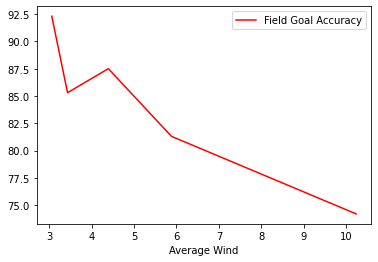

In [ ]:
import matplotlib.pyplot as plt
def visual1():
  df = pd.read_csv("WindField.csv")
  df["Field Goal Accuracy"] = (df["Field Goal Accuracy"].str.rstrip('%')).apply(float)
  df.plot(kind='line',x='Average Wind',y='Field Goal Accuracy', color='red')




############ Function Call ############
visual1()

### Visualization 1 Explanation

This visualization shows the correlation between wind and field goal accuracy, as shown with insight 2. There is a decreasing trend, meaning that as the average speed of the wind increases, the accuracy of the kicks will decrease. This makes sense because wind speed drastically affects the trajectory of a kicked football.

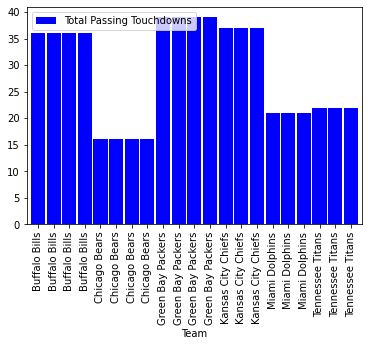

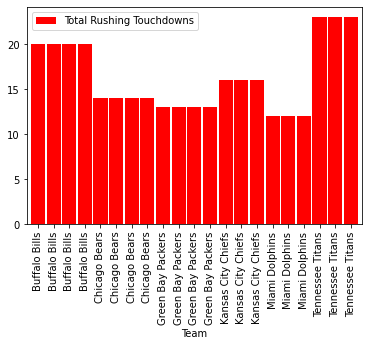

In [ ]:
def visual2():
  df = pd.read_csv('Touchdowns.csv')
  df.plot(kind='bar',x='Team',y='Total Passing Touchdowns',width=.9,color='blue')
  df.plot(kind='bar',x='Team',y='Total Rushing Touchdowns',width=.9,color='red')





############ Function Call ############
visual2()

### Visualization 2 Explanation

These two graphs show the  number of passing and rushing touchdowns, correlating to insight 3. The reason why this is helpful is to see a visualization of which teams struggle to score more in passing vs rushing and how it could possibly relate to weather. Some of these teams such as the Buffalo Bills play in completely different conditions than those like the Miami Dolphins, and it is very possible this could affect the plays they choose to run.

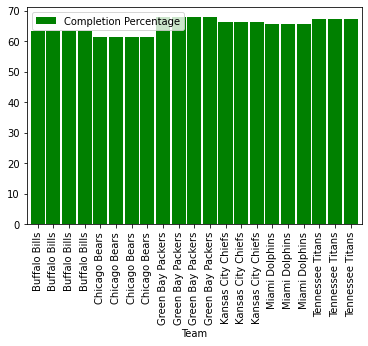

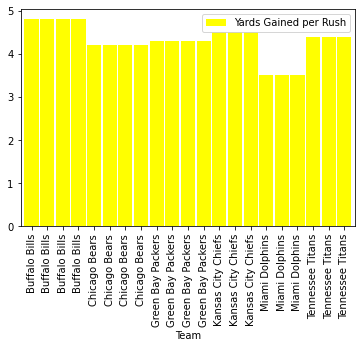

In [ ]:
def visual3():
  df = pd.read_csv('Efficiency.csv')
  df.plot(kind='bar',x='Team',y='Completion Percentage',width=.9,color='green')
  df.plot(kind='bar',x='Team',y='Yards Gained per Rush',width=.9,color='yellow')





############ Function Call ############
visual3()

### Visualization 3 Explanation

These graphs go into more detail than visualization 2 because these show more of the skill of each of these teams. By graphing passing completion and rushing averages from insight 5, we can prove which offenses are more efficient with passing and rushing. The reason why this is helpful is because some teams may score less touchdowns, but have a higher skill set of passing and rushing, so this goes to expand on insight 4 and visualization 2.

## Summary Files

In [ ]:
def summary1():
  df = pd.read_csv("playbyplay.csv")
  df = df.drop(["GameDate"] , axis = 1)
  df_pass = pd.read_csv("PassingOffense.csv")
  df_rush = pd.read_csv("RushingOffense.csv")
  df_kick = pd.read_csv("KickingOffense.csv")
  df_weather = pd.read_csv("GameWeather.csv")

  df_pass = df_pass.drop(["Pass Completions","Pass Attempts","Total Passing Yards"],axis = 1)
  df_rush = df_rush.drop(["Rushing Attempts","Total Rushing Yards"],axis = 1)
  df_kick = df_kick.drop(["Total Field Goal Attempts","Total Field Goals Made"],axis = 1)

  df_merge1 = df.merge(df_pass, how = 'left', left_on = ["OffenseTeam"], right_on= ["Team"])
  df_merge1 = df_merge1.drop(["Team"],axis = 1)
  df_merge1.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
  df_merge1 = df_merge1.drop(["a"], axis = 1)
  df_merge2 = df_merge1.merge(df_rush,how = 'left',left_on = ["OffenseTeam"],right_on=["Team"])
  df_merge2.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
  df_merge2 = df_merge2.drop(["a","Team"], axis = 1)
  df_merge3 = df_merge2.merge(df_kick, how = 'left', left_on = ["OffenseTeam"], right_on = ["Team"])
  df_merge3.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
  df_merge3 = df_merge3.drop(["a","Team"], axis = 1)
  df_weather = df_weather.drop(["Temperature","Wind Speed","Date"],axis = 1)
  #df_weather = df_weather.groupby(["Team", "Weather Description"]).agg({"Weather Description" : "count"})
  df_mergeSUM = df_merge3.merge(df_weather, how = 'left', left_on=["OffenseTeam"], right_on = ["Team"])
  df_mergeSUM.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
  df_mergeSUM = df_mergeSUM.drop(["a","Team"], axis = 1)
  df_mergeSUM = df_mergeSUM.groupby(["OffenseTeam","Completion Percentage","Total Passing Touchdowns","Yards Gained per Rush","Total Rushing Touchdowns","Field Goal Accuracy","Weather Description"]).agg({"Weather Description" : "count"})
  df_mergeSUM.to_csv("MergedSummary.csv")
  return df_mergeSUM





############ Function Call ############
summary1()

Weather Description
OffenseTeam          Completion Percentage Total Passing Touchdowns Yards Gained per Rush Total Rushing Touchdowns Field Goal Accuracy Weather Description                     
Baltimore Ravens     64.8                  21.0                     4.8                   18.0                     94.6%               Clear                174                
                                                                                                                                       Clouds               638                
Buffalo Bills        63.4                  36.0                     4.8                   20.0                     87.5%               Clear                36                 
                                                                                                                                       Clouds               756                
                                                                                                                                       Rain                 144                
                                                                                                                                       Snow                 72                 
Carolina Panthers    58.1                  14.0                     4.0                   17.0                     89.7%               Clear                176                
                                                                                                                                       Clouds               418                
                                                                                                                                       Rain                 22                 
Cincinnati Bengals   69.2                  36.0                     4.0                   16.0                     85.3%               Clear                462                
                                                                                                                                       Clouds               330                
                                                                                                                                       Mist                 66                 
                                                                                                                                       Rain                 66                 
Cleveland Browns     61.5                  21.0                     5.1                   20.0                     72.7%               Clear                250                
                                                                                                                                       Clouds               325                
                                                                                                                                       Mist                 25                 
                                                                                                                                       Rain                 50                 
                                                                                                                                       Snow                 50                 
Denver Broncos       65.4                  20.0                     4.5                   16.0                     83.9%               Clear                308                
                                                                                                                                       Clouds               476                
Green Bay Packers    67.8                  39.0                     4.3                   13.0                     73.5%               Clear                480                
                                                                                                            

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://bluejeans.com/playback/s/zkUSrLonFDqdwGnqOFlbYuae0FMZQmLwJ15BsDUJsBvFxU7UDXvPPyk0SLAp75m3


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
